In [1]:
#imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
#loaded dataset
df = pd.read_csv('retail_data.csv',encoding='Unicode_escape')
df.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#understanding different columns
df.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

In [7]:
#identified data types of all variables, to check variable if any wrongly identified
df.dtypes

Month                                         object
Enquiry Date                                  object
Enquiry Id                                    object
Allocation Status                             object
Status                                        object
State                                         object
City                                          object
Pincode                                        int64
Type of Project                               object
No of Windows                                 object
Source                                        object
Zone                                          object
Dealer Name                                   object
First Action-Call made                        object
Date DD/MM/YY                                 object
First Action-Call Status                      object
Date of Appointment (DD/MM/YY)                object
Second Action-Customer Meeting                object
Date DD/MM/YY.1                               

In [8]:
#description of data including categaroical variables
df.describe(include='all')

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229,229,229,229,229,229,229,229.000000,229,229,...,0.0,171,229.000000,53,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
unique,9,150,228,2,2,1,9,NaN,2,6,...,NaN,13,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN
top,July'16,28-Jul-16,EC21041648139,Dealer,Lost,TAMILNADU,CHENNAI,NaN,Renovation,1 to 5,...,NaN,Price Issue,NaN,Nil,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,4,2,165,176,229,146,NaN,142,150,...,NaN,103,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601742.572052,NaN,NaN,...,NaN,NaN,1045.323144,NaN,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6573.378113,NaN,NaN,...,NaN,NaN,220.032076,NaN,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600001.000000,NaN,NaN,...,NaN,NaN,650.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600033.000000,NaN,NaN,...,NaN,NaN,921.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600059.000000,NaN,NaN,...,NaN,NaN,1030.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600099.000000,NaN,NaN,...,NaN,NaN,1129.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [9]:
#identified presence of null values in variables
df.isna().sum()

Month                                          0
Enquiry Date                                   0
Enquiry Id                                     0
Allocation Status                              0
Status                                         0
State                                          0
City                                           0
Pincode                                        0
Type of Project                                0
No of Windows                                  0
Source                                         0
Zone                                           0
Dealer Name                                    0
First Action-Call made                         0
Date DD/MM/YY                                  0
First Action-Call Status                       0
Date of Appointment (DD/MM/YY)                37
Second Action-Customer Meeting                37
Date DD/MM/YY.1                               37
Second Action-Call Status                     38
Third Action-Quote G

In [10]:
#find metric and come up with threshold percentage which will help in guaging peroformance of the delears


In [13]:
#filtered desired columns for further analysis
df_sample = df[['Month','Allocation Status','State','Dealer Name','Status','Order QTY','Order Val. (Rs. Lac)','Remarks']]

In [14]:
df_sample

,Month,Allocation Status,State,Dealer Name,Status,Order QTY,Order Val. (Rs. Lac),Remarks
0,April'16,Dealer,TAMILNADU,Sunbird,Won,3.0,0.54,NaN
1,April'16,Dealer,TAMILNADU,Winfratech,Lost,NaN,NaN,Price Issue
2,April'16,Dealer,TAMILNADU,Sunbird,Lost,NaN,NaN,Delivery Issue
3,April'16,Direct,TAMILNADU,Direct,Lost,NaN,NaN,Price Issue
4,April'16,Direct,TAMILNADU,Sunbird,Won,8.0,1.63,NaN
...,...,...,...,...,...,...,...,...
224,Jan'17,Dealer,TAMILNADU,Direct,Lost,NaN,NaN,Price Issue
225,Jan'17,Direct,TAMILNADU,Direct,Won,16.0,3.69,NaN
226,Jan'17,Direct,TAMILNADU,Direct,Lost,NaN,NaN,No Requirment
227,Jan'17,Dealer,TAMILNADU,OXXO,Lost,NaN,NaN,Design Infeasibility


In [15]:
#identified presence of null values
df_sample.isna().sum()

Month                     0
Allocation Status         0
State                     0
Dealer Name               0
Status                    0
Order QTY               181
Order Val. (Rs. Lac)    181
Remarks                  58
dtype: int64

In [16]:
#as percentage
df_sample.isna().sum()/len(df_sample)*100 #missing values

Month                    0.000000
Allocation Status        0.000000
State                    0.000000
Dealer Name              0.000000
Status                   0.000000
Order QTY               79.039301
Order Val. (Rs. Lac)    79.039301
Remarks                 25.327511
dtype: float64

In [17]:
df_sample.dtypes #info on datatypes

Month                    object
Allocation Status        object
State                    object
Dealer Name              object
Status                   object
Order QTY               float64
Order Val. (Rs. Lac)    float64
Remarks                  object
dtype: object

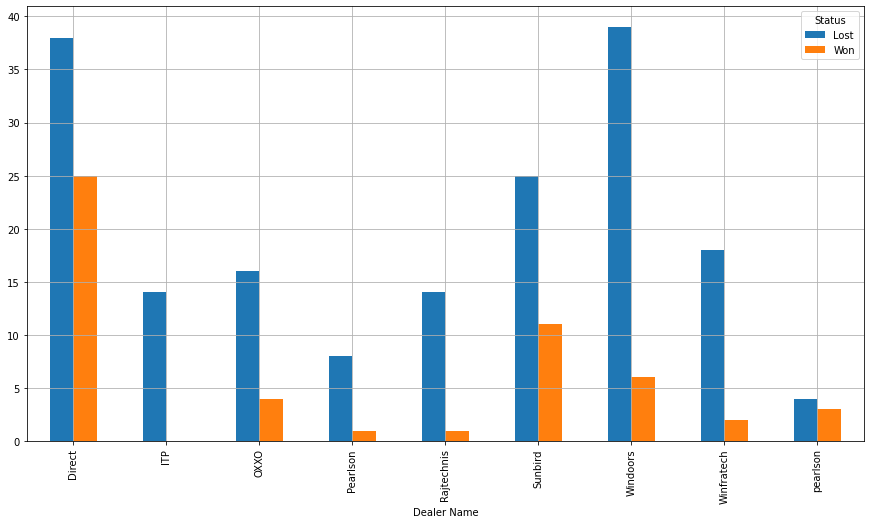

<Figure size 864x504 with 0 Axes>

In [18]:
#relationship between dealer name and status
plt.rcParams['figure.figsize'] = [15,8]
pd.crosstab(df_sample['Dealer Name'],df['Status']).plot(kind='bar')
plt.grid()
plt.figure(figsize=(12,7))
plt.show()

In [19]:
#from the above plot, we can infer that,Direct dealer have acquired highest won status and ITP with no won status 

In [20]:
#average order Quantity
df_sample['Order QTY'].mean()

10.229166666666666

In [21]:
df_sample['Order Val. (Rs. Lac)'].mean()

1.874375

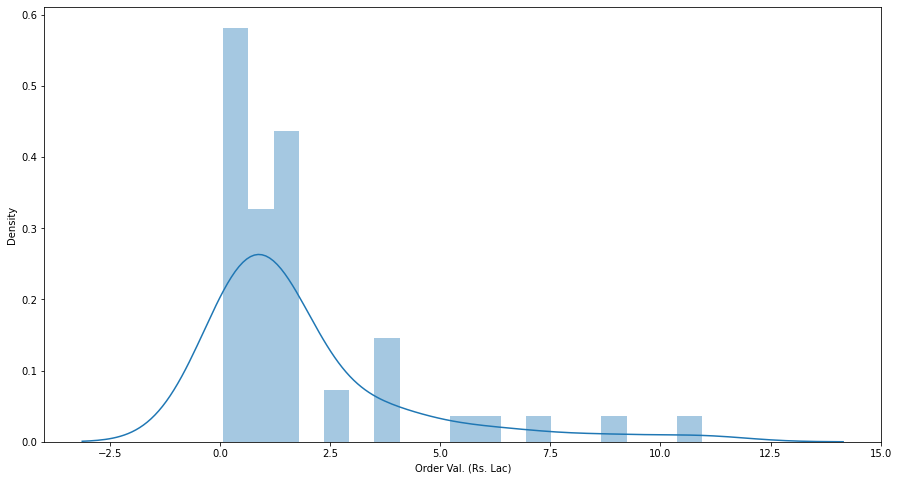

In [22]:
#distribution of order value
plt.rcParams['figure.figsize'] = [15,8]
sns.distplot(df_sample['Order Val. (Rs. Lac)'].dropna())
plt.show()

In [23]:
#created separate dataframe with status won
df_won = df_sample[df_sample['Status']=='Won']
df_won.sample(5)

,Month,Allocation Status,State,Dealer Name,Status,Order QTY,Order Val. (Rs. Lac),Remarks
225,Jan'17,Direct,TAMILNADU,Direct,Won,16.0,3.69,NaN
218,Jan'17,Direct,TAMILNADU,Direct,Won,9.0,1.62,NaN
193,Dec'16,Dealer,TAMILNADU,Windoors,Won,1.0,0.07,NaN
39,June'16,Dealer,TAMILNADU,OXXO,Won,1.0,0.39,NaN
136,Sept'16,Dealer,TAMILNADU,OXXO,Won,2.0,0.68,NaN


In [24]:
#identified null values
df_won.isna().sum()

Month                    0
Allocation Status        0
State                    0
Dealer Name              0
Status                   0
Order QTY                5
Order Val. (Rs. Lac)     5
Remarks                 53
dtype: int64

In [25]:
#dropped null values
df_won.dropna(subset=['Order Val. (Rs. Lac)','Order QTY'],inplace=True)

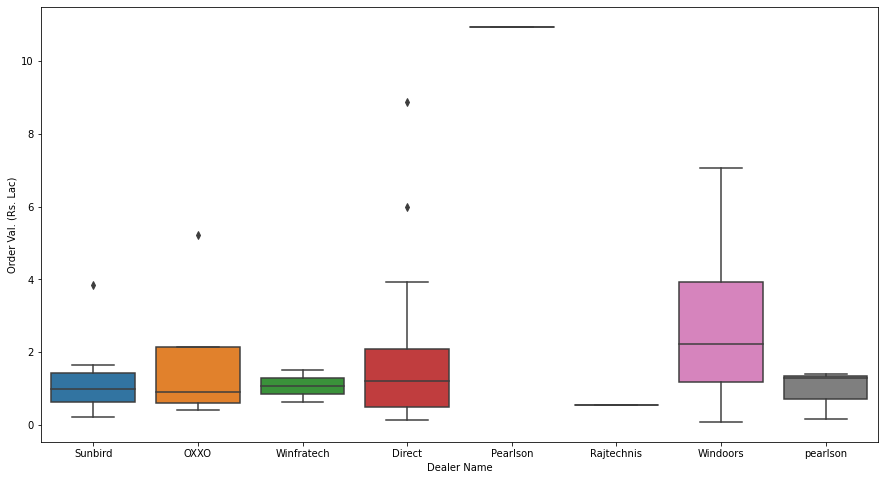

In [26]:
#5 point summary and outliers are observed by using box plot for each dealer and corresponding order value
plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(df_won['Dealer Name'],df_won['Order Val. (Rs. Lac)'])
plt.show()

In [27]:
#even with less won percentage delaer windoors gives us maximum order val
#dealer with more number of won status is Direct

<AxesSubplot:xlabel='Dealer Name', ylabel='count'>

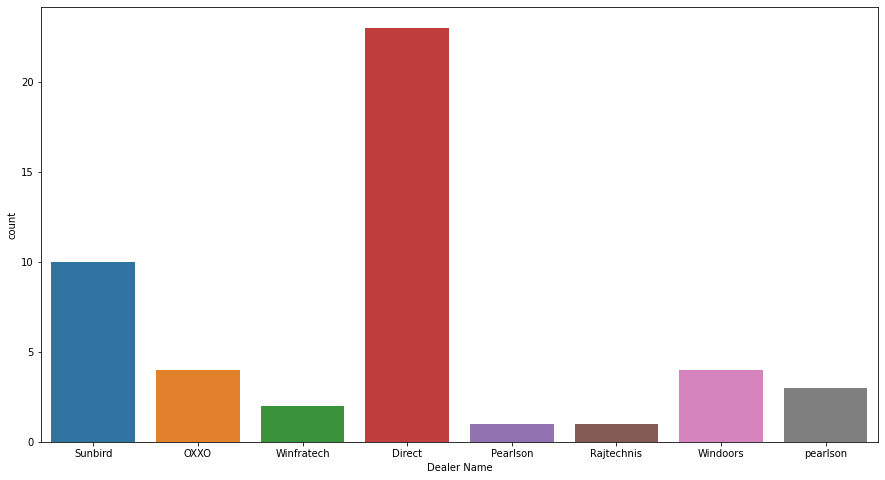

In [28]:
#quantity of orders for each dealer
sns.countplot(df_won['Dealer Name'])

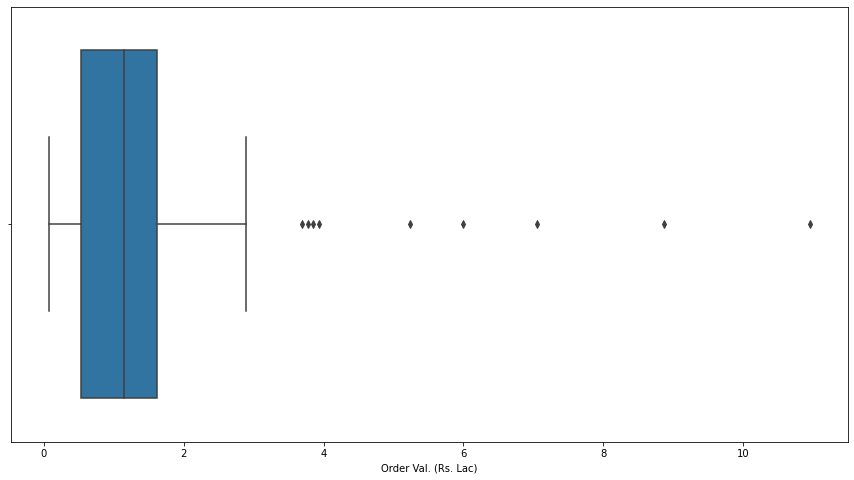

In [29]:
#5 point summary and outliers observed for order value variable
sns.boxplot(df_won['Order Val. (Rs. Lac)'].dropna())
plt.show()

<AxesSubplot:xlabel='Order Val. (Rs. Lac)'>

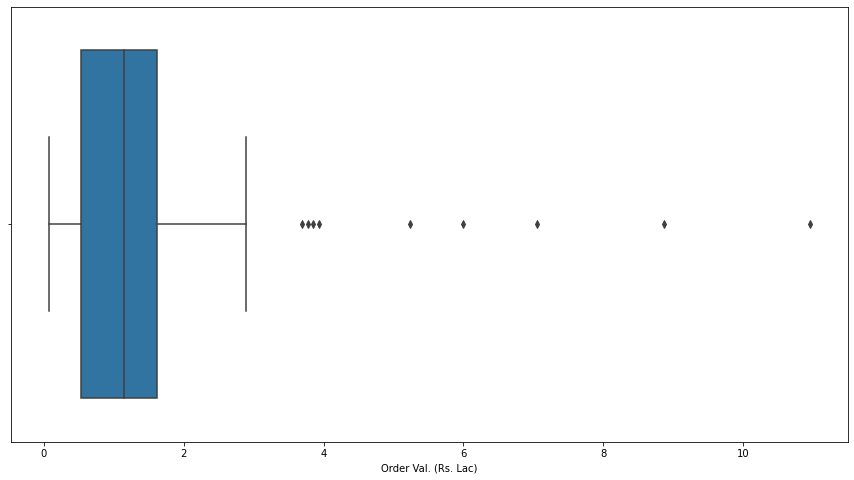

In [30]:
sns.boxplot(df_won['Order Val. (Rs. Lac)'])# box plot with outliers

In [31]:
#treated outliers with IQR method

In [32]:
Q1 = np.quantile(df_won['Order Val. (Rs. Lac)'],0.25)
Q3 = np.quantile(df_won['Order Val. (Rs. Lac)'],0.75)
IQR = Q3-Q1
UB = Q3+1.5*IQR
LB = Q1-1.5*IQR
(df[(df['Order Val. (Rs. Lac)']>UB)|(df['Order Val. (Rs. Lac)']<LB)])
df_won_without_outliers = df[(df['Order Val. (Rs. Lac)'] <= UB)&(df['Order Val. (Rs. Lac)'] >= LB)]   # removing outliers

In [33]:
df_won_without_outliers['Order Val. (Rs. Lac)'].mean() 

0.9389743589743591

In [34]:
df_won['Order Val. (Rs. Lac)'].mean()-df_won_without_outliers['Order Val. (Rs. Lac)'].mean()

0.9354006410256408

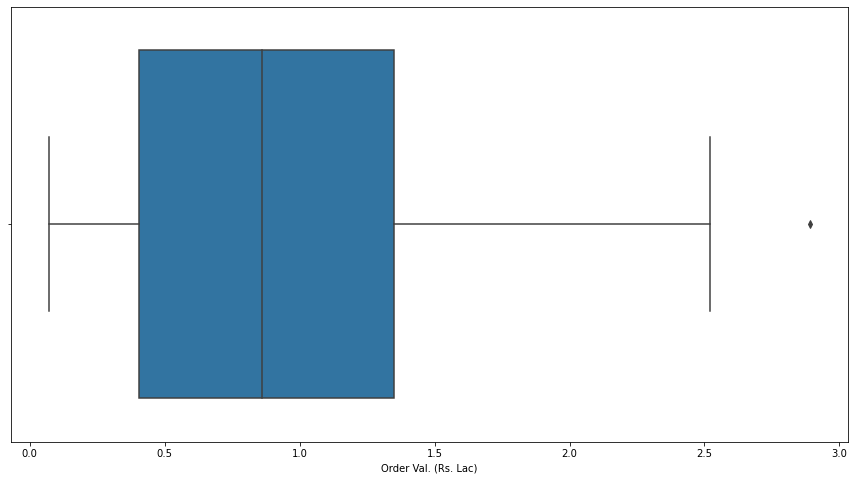

In [35]:
sns.boxplot(df_won_without_outliers['Order Val. (Rs. Lac)'])#without outliers(removed outliers with IQR method)
plt.show()

In [36]:
#total revenue for each delaer using crosstab
df_won.groupby(df_won['Dealer Name'])['Order Val. (Rs. Lac)'].sum().to_frame()

,Order Val. (Rs. Lac)
Dealer Name,
Direct,42.70
OXXO,7.39
Pearlson,10.95
Rajtechnis,0.53
Sunbird,11.93
Windoors,11.54
Winfratech,2.11
pearlson,2.82


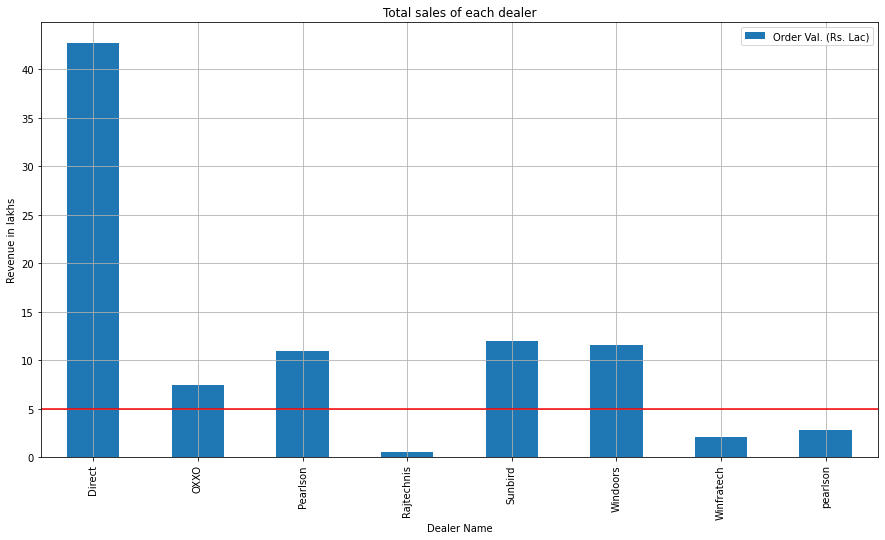

In [37]:
#total revenue for each delaer using bar plot
df_won.groupby(df_won['Dealer Name'])['Order Val. (Rs. Lac)'].sum().to_frame().plot(kind='bar')
plt.axhline(y=5,color='red')
plt.xlabel('Dealer Name')
plt.ylabel('Revenue in lakhs')
plt.title('Total sales of each dealer')
plt.grid()
plt.show()
#direct dealers have generated maximum revenue
#as a trail and error basis, assumed that the threshold revenue as 5 lakhs and above are performers and below are non performers

In [38]:
#we dropped column since no data was recorded
df_won.drop('Remarks',axis=1,inplace=True)

In [39]:
df_won.sample(5)

,Month,Allocation Status,State,Dealer Name,Status,Order QTY,Order Val. (Rs. Lac)
221,Jan'17,Dealer,TAMILNADU,Sunbird,Won,1.0,0.20
199,Dec'16,Direct,TAMILNADU,Direct,Won,1.0,0.22
136,Sept'16,Dealer,TAMILNADU,OXXO,Won,2.0,0.68
185,Dec'16,Dealer,TAMILNADU,pearlson,Won,7.0,1.39
161,Oct'16,Dealer,TAMILNADU,Windoors,Won,41.0,7.05


In [40]:
#created a separate to check city and dealer wise total revenue
df_check = df[['City','Dealer Name','Order Val. (Rs. Lac)']]

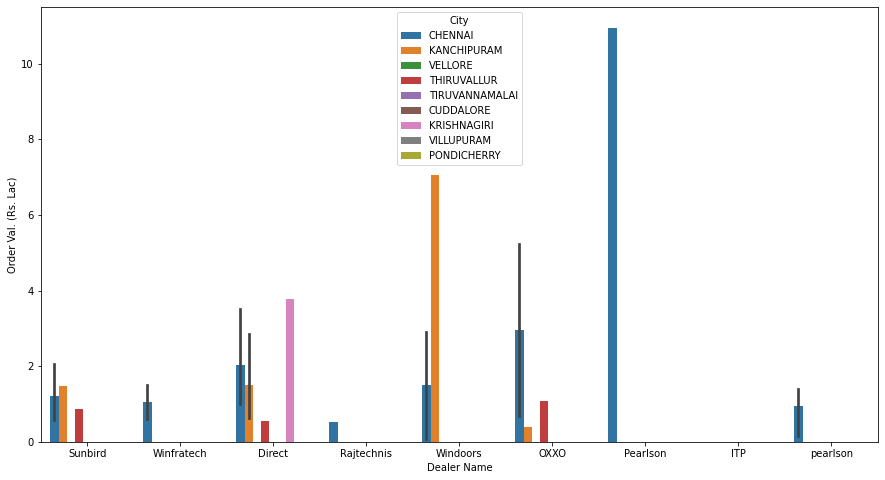

In [41]:
#plotted bar plot for same
sns.barplot(x=df_check['Dealer Name'],y=df_check['Order Val. (Rs. Lac)'],hue=df_check['City'])
plt.show()

In [42]:
df1 = df_check.groupby(['City','Dealer Name'])['Order Val. (Rs. Lac)'].sum().to_frame().sort_values(by='Order Val. (Rs. Lac)')

In [43]:
df1

Order Val. (Rs. Lac)
City           Dealer Name                      
VILLUPURAM     Windoors                     0.00
THIRUVALLUR    ITP                          0.00
PONDICHERRY    Direct                       0.00
KRISHNAGIRI    Windoors                     0.00
KANCHIPURAM    Winfratech                   0.00
VILLUPURAM     ITP                          0.00
THIRUVALLUR    Rajtechnis                   0.00
               Windoors                     0.00
CUDDALORE      Windoors                     0.00
KANCHIPURAM    ITP                          0.00
TIRUVANNAMALAI Sunbird                      0.00
VELLORE        Windoors                     0.00
CHENNAI        ITP                          0.00
KANCHIPURAM    OXXO                         0.39
CHENNAI        Rajtechnis                   0.53
THIRUVALLUR    Direct                       0.54
               Sunbird                      0.86
               OXXO                         1.09
KANCHIPURAM    Sunbird                      1.48
CHENNAI        Winfratech                   2.11
               pearlson                     2.82
KRISHNAGIRI    Direct                       3.78
CHENNAI        Windoors                     4.49
               OXXO                         5.91
KANCHIPURAM    Windoors                     7.05
CHENNAI        Sunbird                      9.59
               Pearlson                    10.95
KANCHIPURAM    Direct                      11.91
CHENNAI        Direct                      26.47

In [44]:
df_won.corr()#strength of relationship between order qty and order val

,Order QTY,Order Val. (Rs. Lac)
Order QTY,1.000000,0.733693
Order Val. (Rs. Lac),0.733693,1.000000


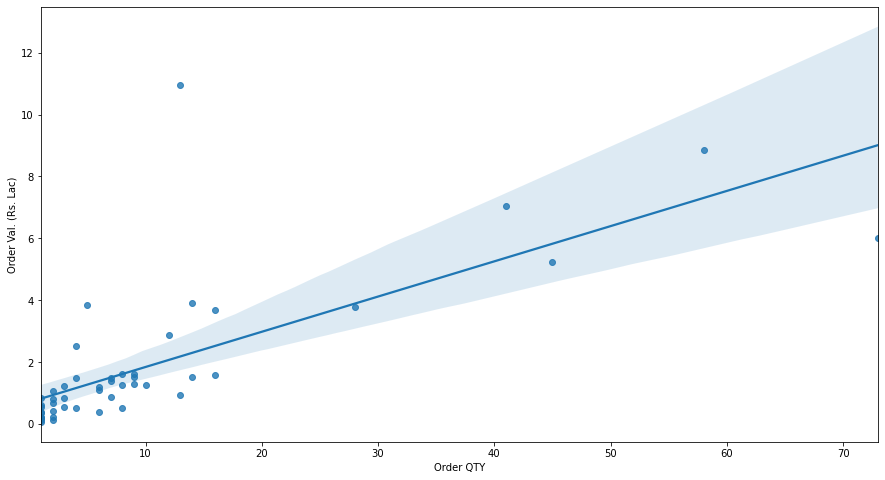

In [45]:
sns.regplot(df_won['Order QTY'],df_won['Order Val. (Rs. Lac)'])
plt.show()
#direction of relationship between order qty and order val